<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Metodo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodo de Galerkin**

El metodo de Galerkin es una tecnica numerica utilizada para encontrar soluciones aproximadas a ecuaciones diferenciales. Se basa en el metodo de residuos ponderados. El metodo tiene el siguiente procedimiento para resolver el siguiente ejercicio:

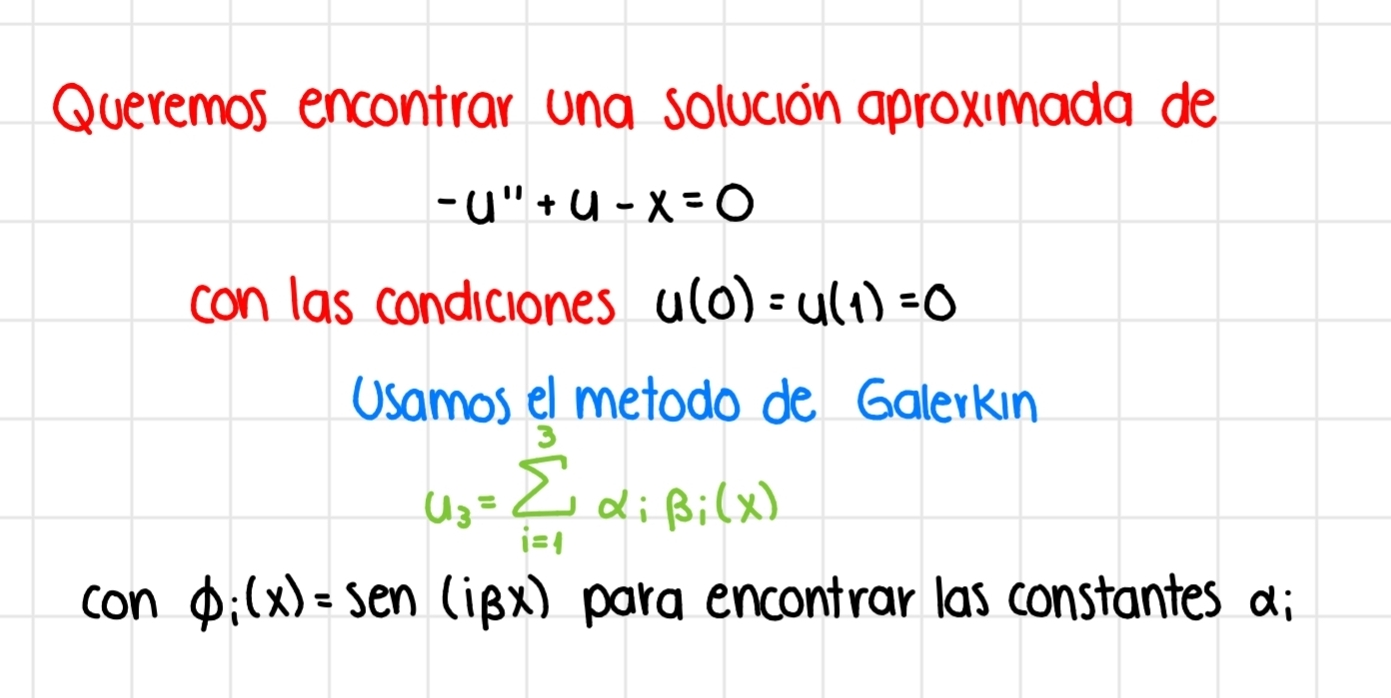

Se propone una solucion aproximada como una combinación lineal de funciones base $\beta_i(x)$ con coeficientes desconocidos $\alpha_i$.$$u_3(x) = \sum_{i=1}^3 \alpha_i \sin(i \pi x)$$Estas funciones base ($\sin(i\pi x)$) se eligen porque cumplen con las condiciones de frontera $u(0)=u(1)=0$.

Sustituimos la solucion aproximada $u_3$ en la ecuacion diferencial ($-u'' + u - x = 0$). Como $u_3$ no es la solucion exacta, la ecuación no nos va a dar cero, sino un error:$$E(x) = -u_3''(x) + u_3(x) - x$$

El metodo de Galerkin nos dice que el residuo es ortogonal a cada una de las funciones base. Entonces la integral del producto del residuo por cada funcion de peso debe ser cero en el dominio $[0, 1]$.$$\int_0^1 E(x) \cdot \beta_j(x) \, dx = 0 \quad \text{para } j=1, 2, 3$$

Ya resolviendo las integrales, obtenemos un sistema de 3 ecuaciones lineales ($\alpha_1, \alpha_2, \alpha_3$) y resolvemos el sistema para encontrar los valores de los coeficientes $\alpha_i$.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definimos las variables
x = sp.symbols('x')
u = sp.Function('u')

ode = -u(x).diff(x, x) + u(x) - x # Escribimos la ecuacion

condiciones = {u(0): 0, u(1): 0} # Ponemos las condiciones de frontera

# Solucion exacta
sol_exacta = sp.dsolve(ode, u(x), ics=condiciones)
u_exacta_expr = sol_exacta.rhs

sp.pprint(u_exacta_expr) # Imprimimos la solucion exacta
# Yo no se porque se sigue vienddo fea

        x         -x 
     ℯ⋅ℯ       ℯ⋅ℯ   
x - ─────── + ───────
          2         2
    -1 + ℯ    -1 + ℯ 


In [ ]:
a1, a2, a3 = sp.symbols('alpha_1 alpha_2 alpha_3') # Definimos los coeficiente

beta = sp.pi # Hacemos que beta valga pi, para que se puedan cumplir las condiciones

# Hacemos las funciones
func_beta_1 = sp.sin(1 * beta * x)
func_beta_2 = sp.sin(2 * beta * x)
func_beta_3 = sp.sin(3 * beta * x)

u_approx = a1*func_beta_1 + a2*func_beta_2 + a3*func_beta_3 # Construimos una funcion para la combinacion lineal

sp.pprint(u_approx)

R = -sp.diff(u_approx, x, 2) + u_approx - x # Definimos el error

eq1 = sp.integrate(R * func_beta_1, (x, 0, 1)) # Aplicamos ya el metodo y hacemos las ecuaciones
eq2 = sp.integrate(R * func_beta_2, (x, 0, 1))
eq3 = sp.integrate(R * func_beta_3, (x, 0, 1))

print(f"Eq 1: {eq1} = 0")
print(f"Eq 2: {eq2} = 0")
print(f"Eq 3: {eq3} = 0")

# Resolvemos el sistema lineal
sol_alphas = sp.solve([eq1, eq2, eq3], [a1, a2, a3])

sp.pprint(sol_alphas)

# Sustituimos los coeficientes
u_galerkin = u_approx.subs(sol_alphas)

print("Solucion aproximada")
sp.pprint(u_galerkin)

α₁⋅sin(π⋅x) + α₂⋅sin(2⋅π⋅x) + α₃⋅sin(3⋅π⋅x)
Eq 1: alpha_1/2 + pi**2*alpha_1/2 - 1/pi = 0
Eq 2: alpha_2/2 + 2*pi**2*alpha_2 + 1/(2*pi) = 0
Eq 3: alpha_3/2 + 9*pi**2*alpha_3/2 - 1/(3*pi) = 0
⎧      2           -1               2     ⎫
⎪α₁: ──────, α₂: ────────, α₃: ───────────⎪
⎨         3             3                3⎬
⎪    π + π       π + 4⋅π       3⋅π + 27⋅π ⎪
⎩                                         ⎭
Solucion aproximada
2⋅sin(π⋅x)   sin(2⋅π⋅x)   2⋅sin(3⋅π⋅x)
────────── - ────────── + ────────────
       3             3              3 
  π + π       π + 4⋅π     3⋅π + 27⋅π  


Hacemos las graficas para ver que pasa con las soluciones

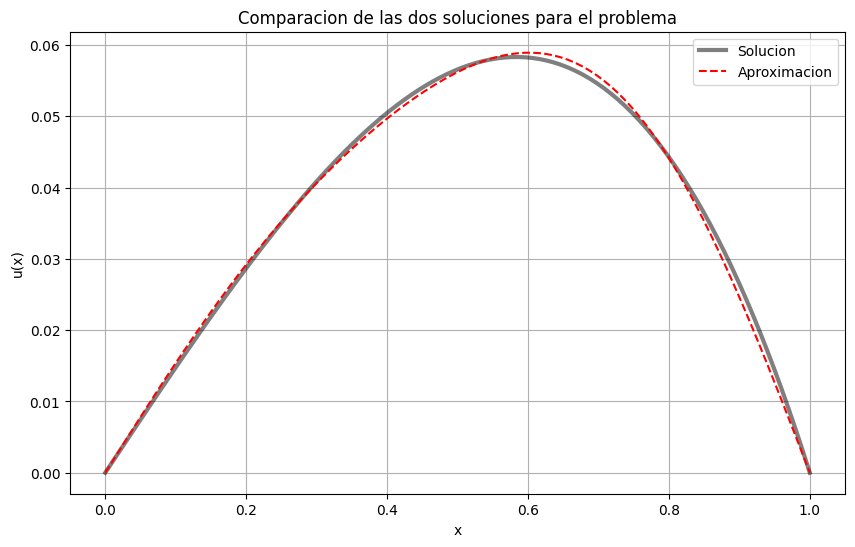

In [ ]:
f_exacta = sp.lambdify(x, u_exacta_expr, modules="numpy")
f_galerkin = sp.lambdify(x, u_galerkin, modules="numpy")

x_vals = np.linspace(0, 1, 100)
y_exacta = f_exacta(x_vals)
y_galerkin = f_galerkin(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_exacta, 'k-', linewidth=3, alpha=0.5, label='Solución Exacta')
plt.plot(x_vals, y_galerkin, 'r--', linewidth=1.5, label=r'Aproximación ($\sin(i \beta x)$)')

plt.title(r"Comparacion de soluciones")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

error_max = np.max(np.abs(y_exacta - y_galerkin))
error_sq = (u_exacta_expr - u_galerkin)**2
error_l2 = sp.sqrt(sp.integrate(error_sq, (x, 0, 1))).evalf()

print(f"Error: {error_mporqpopol
print(f"Error norma: {error_l2:.6e}")

Error: 1.981556e-03
Error norma: 8.441839e-4


Podemos ver en las graficas y en el error mismo, que el metodo es bueno porque su error es muy pequeño y eso tambien lo podemos ver en las graficas, son muy parecidos entonces el metodo funciona